In [1]:
import matplotlib.pyplot as plt
import numpy as np
from astropy.coordinates import Galactocentric, ICRS, SkyCoord, Distance, CartesianRepresentation, SphericalRepresentation
from matplotlib.patches import Ellipse
import astropy.units as u

In [2]:
import matplotlib
 
def set_rc_params(mult=1):
    matplotlib.rcParams.update({'font.size': 18*mult})
    matplotlib.rc('font',family='serif')
    matplotlib.rcParams['legend.fontsize'] = 15.5*mult
    matplotlib.rcParams['axes.linewidth'] = 1.5
    matplotlib.rcParams['xtick.labelsize'] = 16*mult
    matplotlib.rcParams['ytick.labelsize'] = 16*mult
    matplotlib.rcParams['xtick.major.size'] = 10
    matplotlib.rcParams['ytick.major.size'] = 10
    matplotlib.rcParams['xtick.major.width'] = 2
    matplotlib.rcParams['ytick.major.width'] = 2
    matplotlib.rcParams['xtick.minor.size'] = 5
    matplotlib.rcParams['ytick.minor.size'] = 5
    matplotlib.rcParams['xtick.minor.width'] = 1
    matplotlib.rcParams['ytick.minor.width'] = 1
    matplotlib.rcParams['xtick.direction'] = 'in'
    matplotlib.rcParams['ytick.direction'] = 'in'
    matplotlib.rcParams['xtick.bottom'] = True
    matplotlib.rcParams['ytick.left'] = True
    #matplotlib.rcParams['ytick.right'] = True
    matplotlib.rcParams["xtick.minor.visible"] = True
    matplotlib.rcParams["ytick.minor.visible"] = True
    matplotlib.rcParams['axes.labelsize'] = 20*mult
    matplotlib.rcParams['figure.figsize'] = (10,7)
set_rc_params(1)
 

In [3]:
#coordinates on the skY of the host, satellilte and QSO
RAH, DecH = 149.5878735, 32.3698905  # host
RAs, Decs = 149.6921195816266, 32.51841252708709  # satllite
dist = 25.00516842*u.Mpc  # mpc
v_sat = 65.95

cooH = SkyCoord(RAH*u.deg, DecH*u.deg, distance=dist)
cooSat = SkyCoord(RAs*u.deg, Decs*u.deg, distance=dist)

cooQ1 = SkyCoord(149.0967254638672*u.deg, 32.60601806640625*u.deg, distance = dist) #distance is different but for the on sky projection is wnough toassume is the same as host
cooQ2 = SkyCoord(149.58726501464844*u.deg, 32.4006233215332*u.deg, distance=dist)
cooQ3 = SkyCoord(149.81187438964844*u.deg, 32.06591033935547*u.deg, distance=dist)

#distances on the sky between objects
distX = cooH.cartesian.x - cooSat.cartesian.x
distY=cooH.cartesian.y - cooSat.cartesian.y
distZ=cooH.cartesian.z - cooSat.cartesian.z

Dq1 = [cooH.cartesian.y - cooQ1.cartesian.y, cooH.cartesian.z - cooQ1.cartesian.z]
Dq2 = [cooH.cartesian.y - cooQ2.cartesian.y, cooH.cartesian.z - cooQ2.cartesian.z]
Dq3 = [cooH.cartesian.y - cooQ3.cartesian.y, cooH.cartesian.z - cooQ3.cartesian.z]

In [4]:
print(Dq1)

[<Quantity -0.12730789 Mpc>, <Quantity -0.08692424 Mpc>]


# Density plot

In [5]:
streams = np.loadtxt("all_streams.txt")

(149.0, 150.2, 32.0, 32.8)

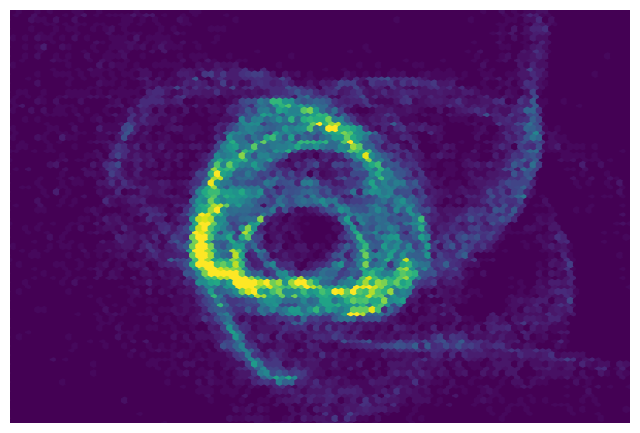

In [6]:

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(1,1,1, aspect='equal')
ax.set_xlim(149., 150.2)
ax.set_ylim(32., 32.8)
ax.set_xlabel("ICRS RA [dec]")
ax.set_ylabel("ICRS Dec [deg]")

a = np.where((streams.T[0] >= 149.) & (streams.T[0] <= 150.2)
             &(streams.T[1] > 32) &  (streams.T[1] < 33 ))

im = ax.hexbin(streams.T[0][a], streams.T[1][a], vmin=0, vmax=50)

plt.axis('off')

In [36]:
# cosmological scaling at host z 
k_scale = 0.101 *u.kpc/u.arcsec
print(k_scale)

0.101 kpc / arcsec


In [153]:
d = 20.8*u.Mpc
(d/u.radian).to(u.kpc/u.arcsec, u.dimensionless_angles())

<Quantity 0.10084125 kpc / arcsec>

In [79]:
tcks = cb.get_ticks()
tcks/len(streams)

array([0.        , 0.00021053, 0.00042105, 0.00063158, 0.00084211,
       0.00105263])

In [165]:
sat_r = 18.89
sat_r_abs = sat_r - Distance(d).distmod.value
sat_mstar = u.Msun*10**((sat_r_abs - 4.65)/-2.5)
sat_mstar

<Quantity 8712176.5946046 solMass>

In [207]:
gridsize = 100
area = (300*u.kpc)**2/gridsize/gridsize
hi_to_star_ratio = 2
column_density_scale = (sat_mstar*hi_to_star_ratio/area/len(streams)).to(u.u*u.cm**-2)
column_density_scale

<Quantity 5.12597247e+15 u / cm2>

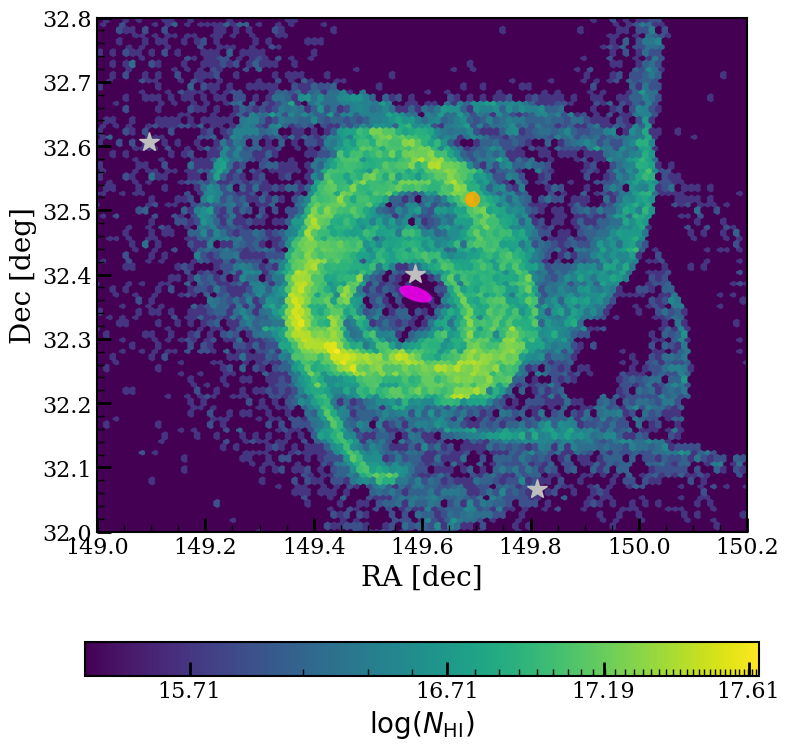

In [216]:

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(1,1,1, aspect=1/np.cos(32.5*u.deg))
ax.set_xlim(149., 150.2)
ax.set_ylim(32., 32.8)
ax.set_xlabel("RA [dec]")
ax.set_ylabel("Dec [deg]" )

ellipse=(1.86/60*2,0.67/60.*2,105 ) #host orientation
ells=Ellipse(xy=(cooH.ra.deg, cooH.dec.deg), width=ellipse[0], height=ellipse[1], angle=(ellipse[2]-90)*-1, fc='magenta', alpha=0.8, zorder=3)
ax.add_artist(ells)

#ax.plot(cooH.ra, cooH.dec, 's',ms = 15, color='darkorange')
qsocolor = (0.75,0.75,0.75)
ax.plot(cooSat.ra, cooSat.dec, 'o',ms=10, c='orange', alpha=.8)
ax.plot(cooQ1.ra, cooQ1.dec, '*', ms=15, c=qsocolor, alpha=1)
ax.plot(cooQ2.ra, cooQ2.dec, '*', ms=15, c=qsocolor, alpha=1)
ax.plot(cooQ3.ra, cooQ3.dec, '*', ms=15, c=qsocolor, alpha=1)

a = np.where((streams.T[0] >= 149.) & (streams.T[0] <= 150.2)
             &(streams.T[1] > 32) &  (streams.T[1] < 33 ))

#im = ax.hexbin(streams.T[0][a], streams.T[1][a], vmin=0, vmax=50)
#im = ax.hexbin(streams.T[0][a], streams.T[1][a], norm=matplotlib.colors.LogNorm())
im = ax.hexbin(streams.T[0][a], streams.T[1][a], gridsize=gridsize,
               norm=matplotlib.colors.FuncNorm((lambda n:np.log10(n+1),lambda c:10**c-1)))

cb = plt.colorbar(im, orientation='horizontal')

tcks = [1, 10, 30, 80]
cb.set_ticks(tcks, labels=['{:.2f}'.format(np.log10(t*column_density_scale.value)) for t in tcks])
cb.set_label(r'$\log(N_{\rm HI})$')

plt.tight_layout()
plt.savefig('column_density.png')

0.6243124312431242 deg


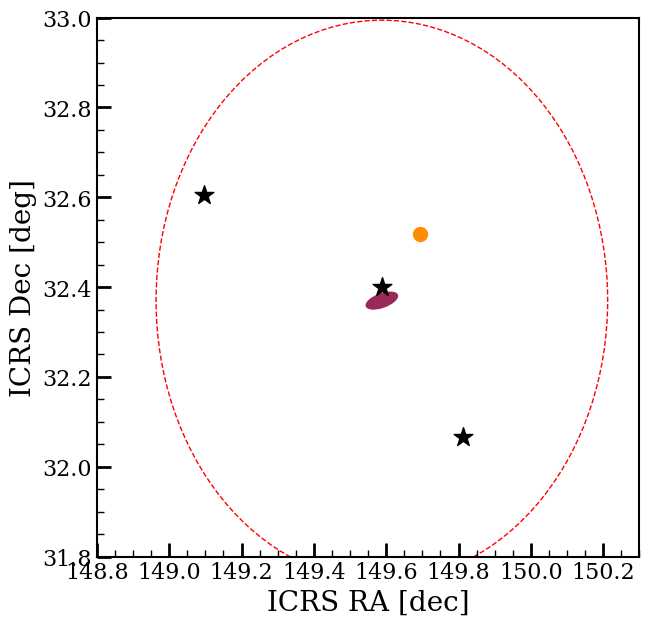

In [37]:
fig = plt.figure(figsize=(7,7))
ax1 = plt.subplot(111)

### skymap
# ax1.set_xlim([-1,1])
# ax1.set_ylim([-1,1])
# ax1.set_xticks([-1,-0.5,0,0.5])
ax1.set_xlim(148.8, 150.3)
ax1.set_ylim(31.8, 33.)
ax1.set_xlabel("ICRS RA [dec]")
ax1.set_ylabel("ICRS Dec [deg]" )


ellipse=(1.86/60*3,0.67/60.*3,105 ) #host orientation
ells=Ellipse(xy=(cooH.ra.deg,cooH.dec.deg), width=ellipse[0], height=ellipse[1], angle=ellipse[2]-90, fc='#992959')
ax1.add_artist(ells)
#sightlines

ax1.scatter([cooQ1.ra.deg,cooQ2.ra.deg, cooQ3.ra.deg],[cooQ1.dec.deg,cooQ2.dec.deg, cooQ3.dec.deg],c='k', marker='*', s=200)
ax1.plot(cooSat.ra.deg, cooSat.dec.deg, 'o', c='darkorange', ms=10)


Rvir=227 *u.kpc
Rvir_deg = (Rvir / k_scale ).to(u.deg)
print(Rvir_deg)
circle1 = plt.Circle((cooH.ra.deg, cooH.dec.deg), Rvir_deg.value, facecolor='none', edgecolor='red', ls='--')
ax1.add_patch(circle1)







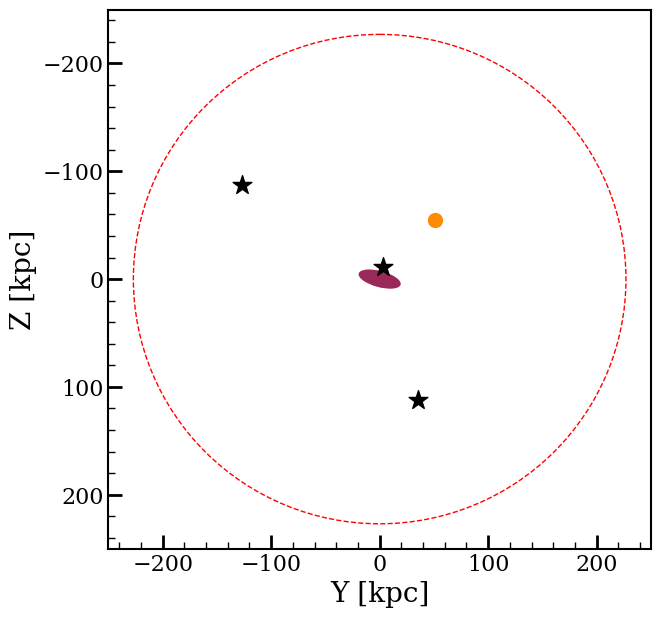

In [39]:
fig = plt.figure(figsize=(7,7))
ax1 = plt.subplot(111)

### skymap
# ax1.set_xlim([-1,1])
# ax1.set_ylim([-1,1])
# ax1.set_xticks([-1,-0.5,0,0.5])
ax1.set_xlim(-250,250)
ax1.set_ylim(250,-250)
ax1.set_xlabel("Y [kpc]")
ax1.set_ylabel("Z [kpc]" )


ellipse=(40,15,105 ) #host orientation
ells=Ellipse(xy=(0,0), width=ellipse[0], height=ellipse[1], angle=ellipse[2]-90, fc='#992959')
ax1.add_artist(ells)
#sightlines

ax1.scatter([Dq1[0].value*1000, Dq2[0].value*1000, Dq3[0].value*1000],
            [Dq1[1].value*1000, Dq2[1].value*1000, Dq3[1].value*1000],c='k', marker='*', s=200)
ax1.plot(distY*1000, distZ*1000, 'o', c='darkorange', ms=10)


Rvir=227 *u.kpc

circle1 = plt.Circle((0,0), Rvir.value, facecolor='none', edgecolor='red', ls='--')
ax1.add_patch(circle1)


TON1129
J0958+3224
J0959+3203


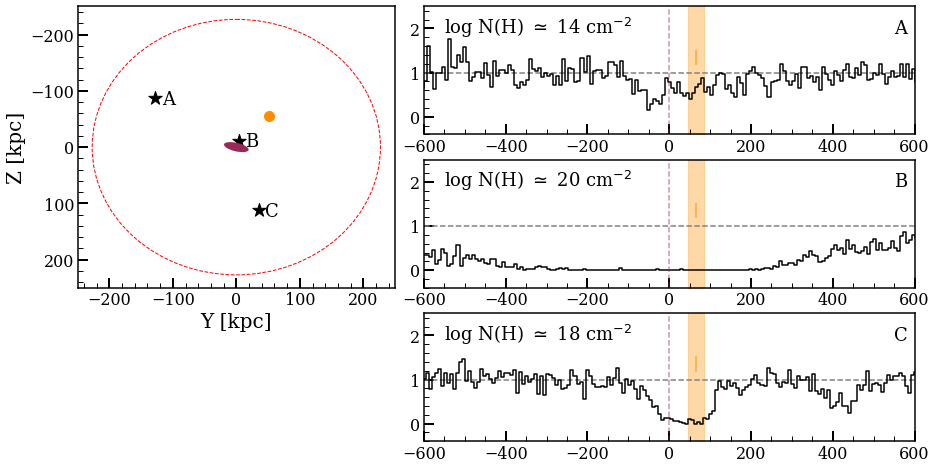

In [15]:
fig = plt.figure(figsize=(15,8))

ax1 = plt.subplot2grid((3,5), (0, 0), colspan=2, rowspan=2)
ax2 = plt.subplot2grid((3, 5), (0, 2), colspan=3,rowspan=1)
ax3 = plt.subplot2grid((3, 5), (1, 2), colspan=3,rowspan=1)
ax4 = plt.subplot2grid((3, 5), (2, 2), colspan=3,rowspan=1)
ax1.set_xlim(-250,250)
ax1.set_ylim(250,-250)
ax1.set_xlabel("Y [kpc]")
ax1.set_ylabel("Z [kpc]" )

# sky map

ellipse=(40,15,105 ) #host orientation
ells=Ellipse(xy=(0,0), width=ellipse[0], height=ellipse[1], angle=ellipse[2]-90, fc='#992959')
ax1.add_artist(ells)

#sightlines
ax1.annotate("A", xy=(Dq1[0].value*1000, Dq1[1].value*1000), xytext= (Dq1[0].value*1000+10, Dq1[1].value*1000+10))
ax1.annotate("B", (Dq2[0].value*1000, Dq2[1].value*1000),  xytext= (Dq2[0].value*1000+10, Dq2[1].value*1000+10) )
ax1.annotate("C", (Dq3[0].value*1000, Dq3[1].value*1000),  xytext= (Dq3[0].value*1000+10, Dq3[1].value*1000+10) )


ax1.scatter([Dq1[0].value*1000, Dq2[0].value*1000, Dq3[0].value*1000],
            [Dq1[1].value*1000, Dq2[1].value*1000, Dq3[1].value*1000],c='k', marker='*', s=200)
ax1.plot(distY*1000, distZ*1000, 'o', c='darkorange', ms=10)

# virial radius 

Rvir=227 *u.kpc
circle1 = plt.Circle((0,0), Rvir.value, facecolor='none', edgecolor='red', ls='--')
ax1.add_patch(circle1)


velc='#a2798f'
sightines = ['TON1129', 'J0958+3224', 'J0959+3203']
logN = np.array([14, 20, 18])

for s, ax, txt, logn in zip(sightines, [ax2,ax3,ax4], ['A', 'B', 'C'],logN):
    print(s)

    sline = np.loadtxt(s+"_HI-1215.dat",skiprows=1)
    v = sline.T[0]
    f = sline.T[1] # normalized flux
    e = sline.T[2]
    ax.set_xlim([-600,600])
    ax.set_ylim([-.4,2.5])
    ax.axhline(1.0, ls='--', c='gray')
    ax.step(v,f, 'k')
    ax.text(550, 1.9,txt)
    ax.text(-550, 1.9,r"log N(H) $\simeq$ "+str(logn) + r" cm$^{-2}$")
    ax.axvline(0, ls='--', c='#992959', alpha=0.5)

    # satellite velocity
    ax.plot([v_sat]*2, [1.2,1.5], color='#ffb250', lw=2)
    ax.fill_between([v_sat-20, v_sat+20], -1,3, color='#ffb250', alpha=0.5)


